In [58]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
#from astroquery.simbad import Simbad
import ephem
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord,get_sun
from astropy.coordinates import FK5
from scipy.signal import argrelextrema

# Define the name of the pulsar

ras = ["00h30m27.4309798s",'00h34m21.8390882s',"10h22m57.9992s",'14h00m37.0139964s','17h30m21.6825641s','17h44m29.390963s',"21h45m50.4588s",'22h56m56.3939023s']
decs = ['+04d51m39.49557s','-05d34m36.80569s','+10d01m52.78s','-14d31m47.03339s','-23d04m30.85061s','-11d34m54.5746s','-07d50m18.514s','-10d24m34.39840s']
#labels=['J2145-0750','J1022+1001','J0030+0451','J1744-1134','J1730-2304','J1400-1431','J1300+1240','J0034-0534','J2256-1024']
labels=['J0030+0451','J0034-0534','J1022+1001','J1400-1431','J1730-2304','J1744-1134','J2145-0750','J2256-1024']

def solar_angle(ra, dec, mjd):
    coo_psr = SkyCoord(ra, dec, frame=FK5)
    t = Time(mjd, format='mjd')
    sunpos = get_sun(t)
    sep = sunpos.separation(coo_psr)
    return sep.value

def readfile(filename):
    # Read data from the file
    with open(filename, 'r') as file:
        data = file.read()

    # Split the data into lines
    lines = data.strip().split('\n')

    # Initialize variables to store unique MJD values and their corresponding data
    unique_mjds = set()
    selected_data = []

    # Process each line of data
    for line in lines:
        values = line.split()
        mjd_random = int(float(values[0]))  # Convert the MJD to an integer

        # Check if this MJD value is unique
        if mjd_random not in unique_mjds:
            unique_mjds.add(mjd_random)
            selected_data.append(list(map(float, values)))

    # Convert the selected data to a NumPy array
    selected_data = np.array(selected_data)

    # Extract columns
    mjd_rec = selected_data[:, 0]
    dm_rec = selected_data[:, 1]
    dmerr = selected_data[:, 2]

    return mjd_rec, dm_rec, dmerr


# Define empty arrays to store the data for each pulsar
mjds = []
dms = []
dmerrs = []
solar_angles = []
local_minima_indices=[]
# Define the filenames for each pulsar
#filenames = ['../chain_J2145/swgp_nearth_1sigma.txt','../chain_J1022/swgp_nearth_dmgp_new_1sigma.txt','../chain_J0030/swgp_nearth_1sigma.txt','../chain_J1744/swgp_nearth_1sigma.txt','../chain_J1730/swgp_nearth_1sigma.txt','../chain_J1400/swgp_nearth_1sigma.txt','../chain_J1300/swgp_nearth_1sigma.txt','../chain_J0034/swgp_nearth_1sigma_allnoise.txt','../chain_J2256/swgp_nearth_1sigma.txt']

filenames=['../chain_J0030/swgp_nearth_1sigma.txt','../chain_J0034/swgp_nearth_1sigma.txt','../chain_J1022/swgp_nearth_dmgp_new_1sigma.txt','../chain_J1400/swgp_nearth_1sigma.txt','../chain_J1730/swgp_nearth_1sigma.txt','../chain_J1744/swgp_nearth_1sigma.txt','../chain_J2145/swgp_nearth_1sigma.txt','../chain_J2256/swgp_nearth_1sigma.txt']

# Loop over each pulsar
for filename in filenames:
    # Read the data from the file
    mjd_rec, dm_rec, dmerr = readfile(filename)
    
    # Append the data to the respective arrays
    mjds.append(mjd_rec)
    dms.append(dm_rec)
    dmerrs.append(dmerr)
    solar_angles.append(solar_angle(ras[filenames.index(filename)], decs[filenames.index(filename)], mjd_rec))
    

for i in range(len(solar_angles)):  
    local_minima_indices.append(argrelextrema(solar_angles[i], np.less)[0])

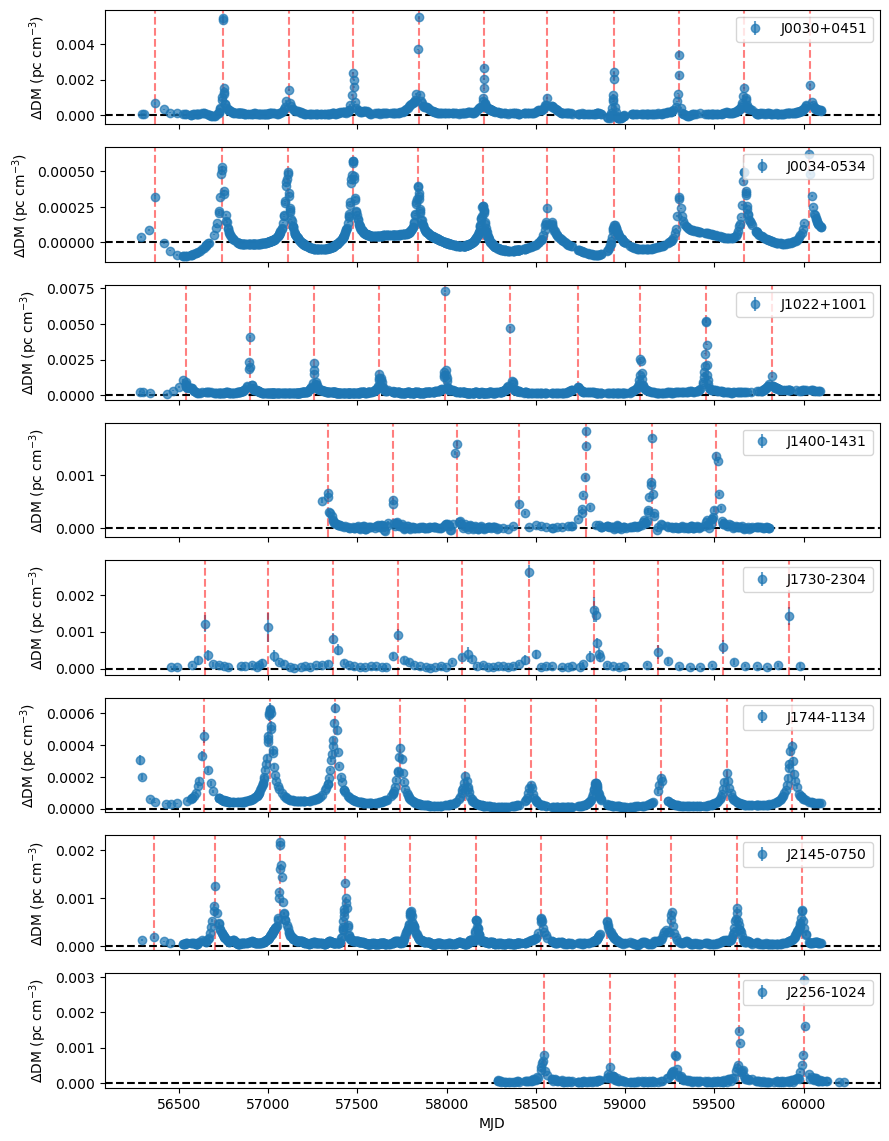

In [59]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(len(mjds), 1, sharex=True,figsize=(10, 14))

# Loop over each pulsar
for i in range(len(mjds)):
    # Plot the data with error bars
    axs[i].errorbar(mjds[i], dms[i], yerr=dmerrs[i], fmt='o', alpha=0.7, label=labels[i])
    for index in local_minima_indices[i]:
        axs[i].axvline(x=mjds[i][index], color='r', linestyle='--',alpha=0.5)
    axs[i].axhline(y=0, color='k', linestyle='--')
    axs[i].set_ylabel('$\Delta$DM (pc cm$^{-3}$)')
    axs[i].legend(loc='upper right', frameon=True)

# Set the x-axis label
axs[-1].set_xlabel('MJD')

# Show the plot
plt.show()


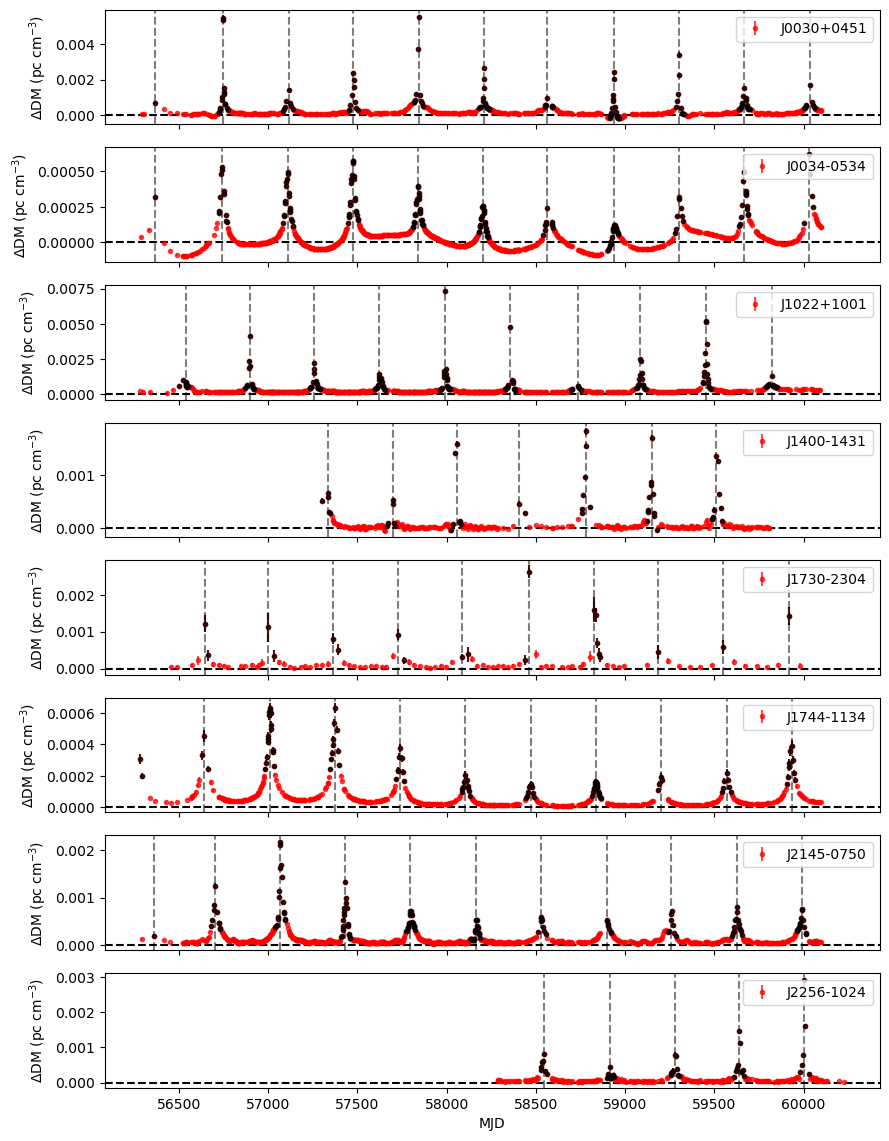

In [60]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(len(mjds), 1, sharex=True, figsize=(10, 14))

# Loop over each pulsar
for i in range(len(mjds)):
    # Plot the data with error bars
    axs[i].errorbar(mjds[i], dms[i],yerr=dmerrs[i] , fmt='o', color='r', label=labels[i],alpha=0.7,markersize=3)
    for index in local_minima_indices[i]:
        axs[i].axvline(x=mjds[i][index], color='k', linestyle='--', alpha=0.5)
    axs[i].axhline(y=0, color='k', linestyle='--')
    axs[i].set_ylabel('$\Delta$DM (pc cm$^{-3}$)')
    axs[i].legend(loc='upper right', frameon=True)

    # Plot the points within 30 degrees solar angle with a different color
    mask = np.abs(solar_angles[i]) <= 30
    axs[i].errorbar(mjds[i][mask], dms[i][mask], yerr=dmerrs[i][mask],fmt='o',color='k', label='Within 30 degrees',alpha=0.7,markersize=3)
    
# Set the x-axis label
axs[-1].set_xlabel('MJD')

# Show the plot
plt.show()


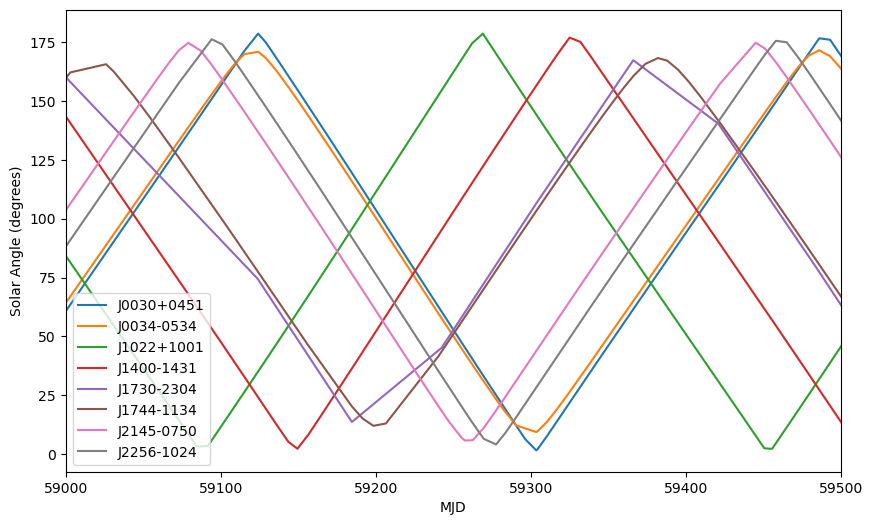

In [61]:
# Create a figure
plt.figure(figsize=(10, 6))

# Plot the solar angle as a function of time
plt.plot(mjds[0], solar_angles[0], label=labels[0])
plt.plot(mjds[1], solar_angles[1], label=labels[1])
plt.plot(mjds[2], solar_angles[2], label=labels[2])
plt.plot(mjds[3], solar_angles[3], label=labels[3])
plt.plot(mjds[4], solar_angles[4], label=labels[4])
plt.plot(mjds[5], solar_angles[5], label=labels[5])
plt.plot(mjds[6], solar_angles[6], label=labels[6])
plt.plot(mjds[7], solar_angles[7], label=labels[7])
#plt.plot(mjds[8], solar_angles[8], label=labels[8])

# Set the x-axis label
plt.xlabel('MJD')

# Set the y-axis label
plt.ylabel('Solar Angle (degrees)')
plt.xlim(59000, 59500)
# Add a legend
plt.legend()

# Show the plot
plt.show()


In [62]:
# Define the ecliptic latitudes of each pulsar
ecliptic_latitudes = []

# Loop over each pulsar
for i in range(len(ras)):
    # Create a SkyCoord object for the pulsar
    coo_psr = SkyCoord(ras[i], decs[i], frame=FK5)
    
    # Get the ecliptic latitude of the pulsar
    ecliptic_latitude = coo_psr.barycentrictrueecliptic.lat.deg
    
    # Append the ecliptic latitude to the list
    ecliptic_latitudes.append(ecliptic_latitude)

# Print the pulsar names and their ecliptic latitudes
for i in range(len(labels)):
    print(f"Pulsar: {labels[i]}, Ecliptic Latitude: {ecliptic_latitudes[i]} degrees")



Pulsar: J0030+0451, Ecliptic Latitude: 1.4456318195071587 degrees
Pulsar: J0034-0534, Ecliptic Latitude: -8.528480872096221 degrees
Pulsar: J1022+1001, Ecliptic Latitude: -0.06392337415273482 degrees
Pulsar: J1400-1431, Ecliptic Latitude: -2.106413769051678 degrees
Pulsar: J1730-2304, Ecliptic Latitude: 0.18894813273302513 degrees
Pulsar: J1744-1134, Ecliptic Latitude: 11.8052313251422 degrees
Pulsar: J2145-0750, Ecliptic Latitude: 5.313045449062068 degrees
Pulsar: J2256-1024, Ecliptic Latitude: -3.4099243752726482 degrees


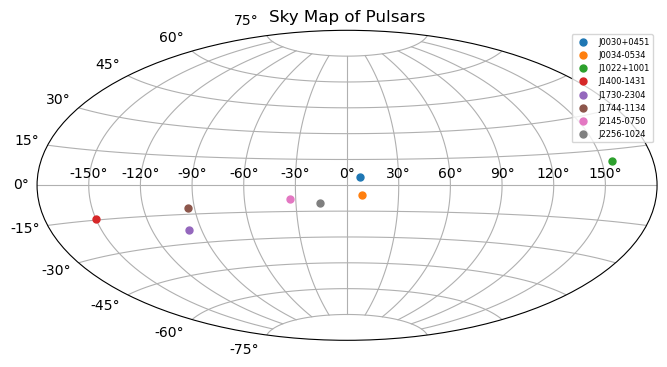

In [63]:
# Create a SkyCoord object for each pulsar
coords_pulsars = [SkyCoord(ra, dec, unit=(u.hourangle, u.deg)) for ra, dec in zip(ras, decs)]

# Create a figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="aitoff")

# Plot the pulsars on the sky map
for coord, label in zip(coords_pulsars, labels):
    ax.plot(coord.ra.wrap_at(180 * u.deg).radian, coord.dec.radian, "o", markersize=5, label=label)

# Set the title and legend
ax.set_title("Sky Map of Pulsars")
ax.legend(loc="upper right", frameon=True, fontsize=6)


# Show the sky map
plt.grid(True)

plt.show()


[(0.005595059837195523, 0.002426411597434242), (0.021496579816604185, 0.00931815827139004), (0.03739250587694067, 0.01620421400906558), (0.05328446397217472, 0.023082943657886205), (0.06917394274792785, 0.029952662859623693), (0.08506231093062107, 0.0368116396388617), (0.10095085102374586, 0.04365810303174037), (0.11684079860876628, 0.05049025566102969), (0.13273337702492644, 0.05730628697471267), (0.14862981954255047, 0.06410438418872313), (0.16453137549630276, 0.07088273903340682), (0.1804393025169053, 0.07763955008625303), (0.1963548516633256, 0.08437302207482701), (0.21227925348350918, 0.0910813642716949), (0.22821371070259966, 0.09776278985681555), (0.24415939908870143, 0.1044155171692006), (0.2601174743710924, 0.11103777258429262), (0.2760890813674592, 0.11762779388032181), (0.2920753623547108, 0.12418383302650914), (0.30807746426788685, 0.13070415831156582), (0.32409654638216034, 0.1371870567020379), (0.34013379016842266, 0.14363083734357723), (0.3561904117161835, 0.150033836424

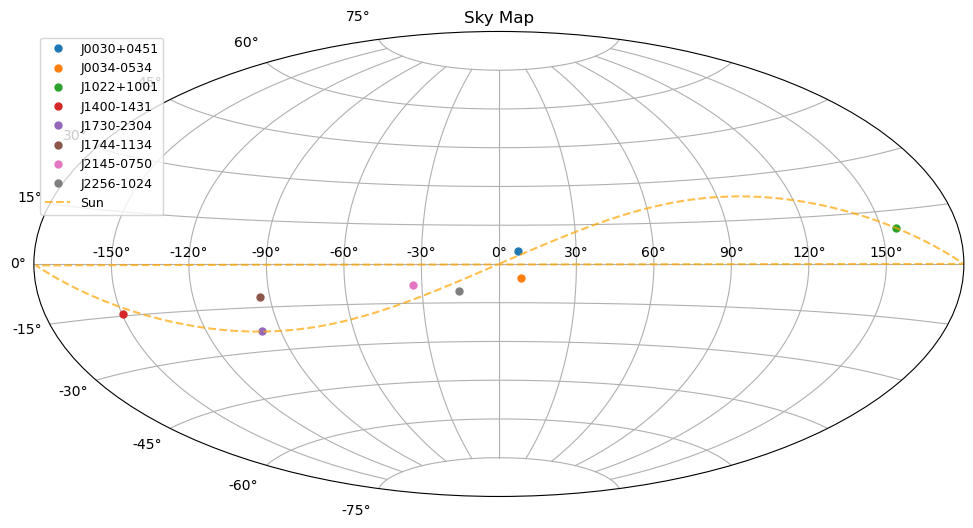

In [64]:
import datetime
import ephem

# Create a SkyCoord object for the observer's location
observer = ephem.Observer()


# Create a list to store the positions of the sun
sun_positions = []

# Set the start and end dates for the calculation
start_date = datetime.datetime(2022, 3, 21)
end_date = datetime.datetime(2023, 3, 20)

# Calculate the position of the sun for each day in the year
current_date = start_date
while current_date <= end_date:
    observer.date = current_date
    sun = ephem.Sun()
    sun.compute(observer)
    sun_positions.append((sun.ra, sun.dec))
    current_date += datetime.timedelta(days=1)


print(sun_positions)
# Convert the sun positions to SkyCoord objects
sun_coords = [SkyCoord(str(ra), str(dec), unit=(u.hourangle, u.deg)) for ra, dec in sun_positions]
# Create a figure
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection="aitoff")


# Plot the pulsars on the sky map
for coord, label in zip(coords_pulsars, labels):
    ax.plot(coord.ra.wrap_at(180 * u.deg).radian, coord.dec.radian, "o", markersize=5, label=label)

# Plot the path of the sun on the sky map
ax.plot([coord.ra.wrap_at(180.0*u.deg).radian for coord in sun_coords],
        [coord.dec.radian for coord in sun_coords], "--", color="orange", alpha=0.7,label="Sun")


# Set the title and legend
ax.set_title("Sky Map")
ax.legend(loc="upper left", frameon=True, fontsize=9)

# Show the sky map
plt.grid(True)
plt.show()


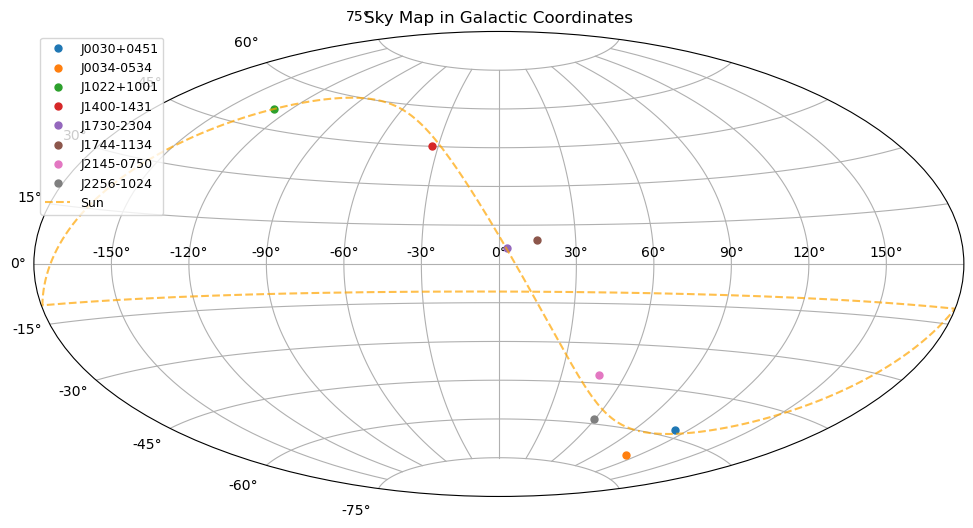

In [65]:
# Convert the pulsar coordinates to galactic coordinates
galactic_coords_pulsars = [coord.transform_to('galactic') for coord in coords_pulsars]

# Convert the sun coordinates to galactic coordinates
galactic_coords_sun = [coord.transform_to('galactic') for coord in sun_coords]

# Create a figure
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection="aitoff")

# Plot the pulsars on the sky map in galactic coordinates
for coord, label in zip(galactic_coords_pulsars, labels):
    ax.plot(coord.l.wrap_at(180 * u.deg).radian, coord.b.radian, "o", markersize=5, label=label)

# Plot the path of the sun on the sky map in galactic coordinates
ax.plot([coord.l.wrap_at(180.0*u.deg).radian for coord in galactic_coords_sun],
        [coord.b.radian for coord in galactic_coords_sun], "--", color="orange", alpha=0.7,label="Sun")

# Set the title and legend
ax.set_title("Sky Map in Galactic Coordinates")
ax.legend(loc="upper left", frameon=True, fontsize=9)

# Show the sky map
plt.grid(True)
plt.show()


TypeError: whampy.whampyTableMixin.SkySurveyMixin.intensity_map() got multiple values for keyword argument 'ax'

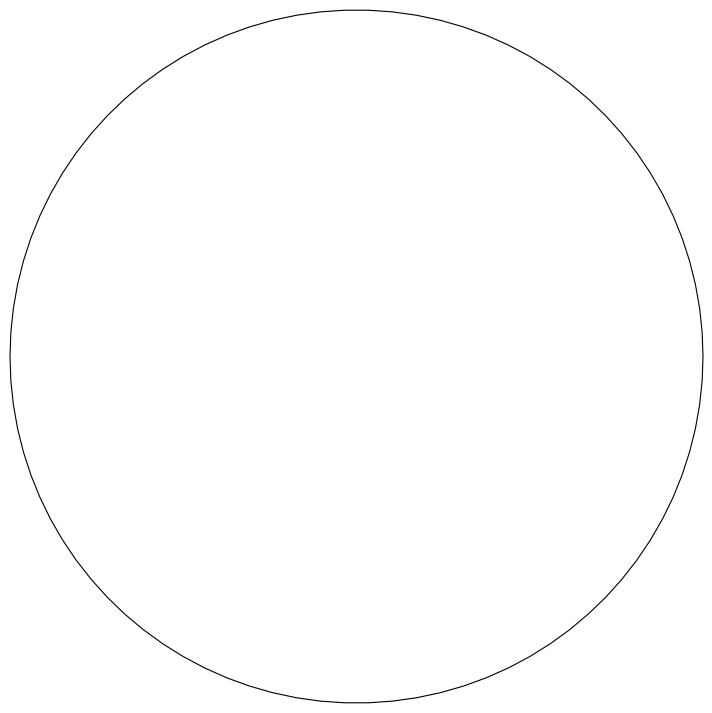

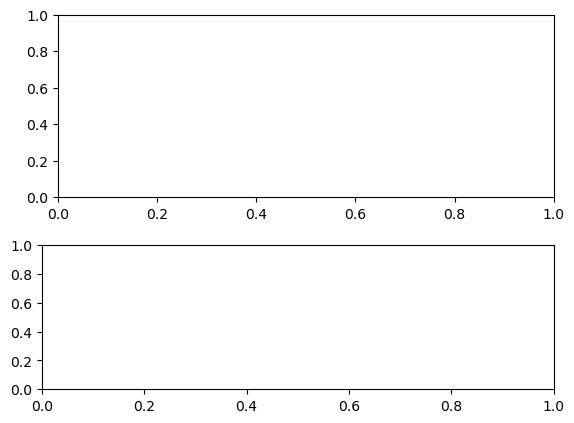

In [94]:
from whampy.skySurvey import SkySurvey
import cartopy.crs as ccrs
survey = SkySurvey()
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection = ccrs.Stereographic())
lrange = [50,-50]
brange = [-20,20]
#fig = survey.intensity_map(ax=ax, colorbar=True,lrange = lrange, brange = brange, transform = ccrs.PlateCarree(),cbar_kwargs={"orientation": "horizontal"})
fig = survey.click_map(ax=ax, colorbar=True,lrange = lrange, brange = brange, transform = ccrs.PlateCarree(),cbar_kwargs={"orientation": "horizontal"})


for coord, label in zip(galactic_coords_pulsars, labels):
    ax.plot(coord.l.wrap_at(180.0 * u.deg), coord.b, "o", color='k', markersize=5, label=label)
    ax.text(coord.l.wrap_at(180.0 * u.deg).value, coord.b.value, label, fontsize=8, ha='center', va='bottom')



plt.show()